In [1]:
!python3 --version

Python 3.7.0


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
BX_BOOK_RATINGS_DF = pd.read_csv("BX-Book-Ratings.csv",encoding='ISO-8859-1',sep=",",header="infer")
BX_BOOKS_DF = pd.read_csv("BX-Books.csv",sep=",",header="infer",encoding='ISO-8859-1')
BX_USERS_DF = pd.read_csv("BX-Users.csv",sep=",",header="infer",encoding='ISO-8859-1')

/Users/anubhav.nanda/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/anubhav.nanda/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
BX_BOOK_RATINGS_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
user_id    1048575 non-null int64
isbn       1048575 non-null object
rating     1048575 non-null int64
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [5]:
BX_BOOKS_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
isbn                   271379 non-null object
book_title             271379 non-null object
book_author            271378 non-null object
year_of_publication    271379 non-null object
publisher              271377 non-null object
dtypes: object(5)
memory usage: 10.4+ MB


In [6]:
BX_USERS_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 3 columns):
user_id     278859 non-null object
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), object(2)
memory usage: 6.4+ MB


In [7]:
BX_BOOK_RATINGS_DF.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [8]:
BX_BOOKS_DF.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [9]:
BX_USERS_DF.head()

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
BX_BOOK_RATINGS_DF.shape

(1048575, 3)

In [11]:
BX_BOOKS_DF.shape

(271379, 5)

In [12]:
BX_USERS_DF.shape

(278859, 3)

In [13]:
BX_USERS_DF.loc[BX_USERS_DF['user_id'] == 1]

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN


# Splitting Ratings into train and test

In [14]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(BX_BOOK_RATINGS_DF,test_size=0.25,random_state=85)

In [15]:
train.shape,test.shape

((786431, 3), (262144, 3))

# Performing User Base Collaboratcive filtering

In [16]:
n_users = BX_BOOK_RATINGS_DF.user_id.unique().shape[0]
n_books = BX_BOOK_RATINGS_DF.isbn.unique().shape[0]

In [17]:
n_users,n_books

(95513, 322102)

In [18]:
data_matrix = np.zeros((n_users,n_books))

In [29]:
#for line in BX_BOOK_RATINGS_DF.itertuples():
#    print(line)
#
ratings_new = BX_BOOK_RATINGS_DF[BX_BOOK_RATINGS_DF.isbn.isin(BX_BOOKS_DF.isbn)]
ratings_new = ratings_new[ratings_new.user_id.isin(BX_USERS_DF.user_id)]

In [33]:
ratings_new.shape

(932713, 3)

In [38]:
ratings_new.head(100)

,user_id,isbn,rating
9561,2,195153448,0
9563,8,2005018,5
9564,8,60973129,0
9565,8,374157065,0
9566,8,393045218,0
9567,8,399135782,0
9568,8,425176428,0
9569,8,671870432,0
9570,8,679425608,0
9571,8,074322678X,5


In [35]:
sparsity = 1.0-len(ratings_new)/float(n_users*n_books)

In [36]:
sparsity

0.9999696825882344

In [37]:
ratings_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932713 entries, 9561 to 1048574
Data columns (total 3 columns):
user_id    932713 non-null int64
isbn       932713 non-null object
rating     932713 non-null int64
dtypes: int64(2), object(1)
memory usage: 28.5+ MB


In [39]:
ratings_explicit = ratings_new[ratings_new.rating != 0]
ratings_implicit = ratings_new[ratings_new.rating == 0]

In [43]:
ratings_explicit.shape

(349765, 3)

In [41]:
ratings_implicit.shape

(582948, 3)

In [44]:
users_exp_ratings = BX_USERS_DF[BX_USERS_DF.user_id.isin(ratings_explicit.user_id)]
users_imp_ratings = BX_USERS_DF[BX_USERS_DF.user_id.isin(ratings_implicit.user_id)]

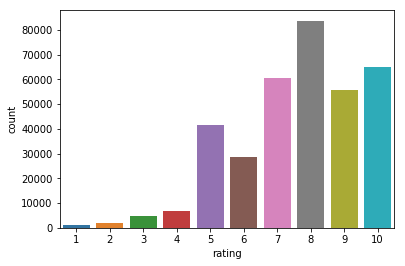

In [46]:
sns.countplot(data=ratings_explicit,x='rating')
plt.show()

In [53]:
train = train[~train['isbn'].str.contains('[A-Za-z]')]
train_data_matrix = np.zeros((n_users, n_books))
for line in train.itertuples():
    train_data_matrix[line[1]-1,int(line[2])-1] = line[3]
    #[user_id index, movie_id index] = given rating.
    #train_data_matrix[line[1]-1, line[2]-1] = line[3] 
#train_data_matrix

IndexError: index 231392 is out of bounds for axis 0 with size 95513